# Modeling work on the CO v=0-1 absorption band

In [1]:
basepath = '/orange/adamginsburg/jwst/brick'

In [2]:
import numpy as np
import pyspeckitmodels

Could not find atran.txt.  atran atmospheric transition model will not be available


In [3]:
from astropy import units as u

In [4]:
from tqdm.notebook import tqdm

In [5]:
from astroquery.svo_fps import SvoFps

In [15]:
%matplotlib inline
import matplotlib.pyplot as pl
pl.rcParams['figure.figsize'] = (10,8)
pl.rcParams['font.size'] = 16

In [7]:
instrument = 'NIRCam'
telescope = 'JWST'
filt466 = 'F466N'
wavelength_table_466 = SvoFps.get_transmission_data(f'{telescope}/{instrument}.{filt466}')

In [8]:
wavelength_table_466[:5]

Wavelength,Transmission
AA,
float64,float64
45658.1,0.000107229
45671.6,0.00014
45685.1,0.000181014
45698.6,0.000231183
45712.2,0.000291353


In [9]:
filterlist = SvoFps.get_filter_list('JWST', 'NIRCam')
filterlist.add_index('filterID')

In [10]:
filterlist.loc['JWST/NIRCam.F466N']

FilterProfileService,filterID,WavelengthUnit,WavelengthUCD,PhotSystem,DetectorType,Band,Instrument,Facility,ProfileReference,CalibrationReference,Description,Comments,WavelengthRef,WavelengthMean,WavelengthEff,WavelengthMin,WavelengthMax,WidthEff,WavelengthCen,WavelengthPivot,WavelengthPeak,WavelengthPhot,FWHM,Fsun,PhotCalID,MagSys,ZeroPoint,ZeroPointUnit,Mag0,ZeroPointType,AsinhSoft,TrasmissionCurve
,,,,,,,,,,,,,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,erg s / (A cm2),,,Jy,,,,,
object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,object,float64,object,float64,object
ivo://svo/fps,JWST/NIRCam.F466N,Angstrom,em.wl,NIRCam,1,,NIRCam,JWST,https://jwst-docs.stsci.edu/display/JTI/NIRCam+Filters,,NIRCam F466N filter,"includes NIRCam optics, DBS, QE and JWST Optical Telescope Element",46544.303736584,46545.305761355,46540.477222667,46021.350197247,47042.621884854,535.40523943323,46548.339825337,46544.303736584,46563.4,46541.156644092,520.35830830914,0.42613770545148,JWST/NIRCam.F466N/Vega,Vega,157.77306515275,Jy,0.0,Pogson,0.0,http://svo2.cab.inta-csic.es//theory/fps/fps.php?ID=JWST/NIRCam.F466N


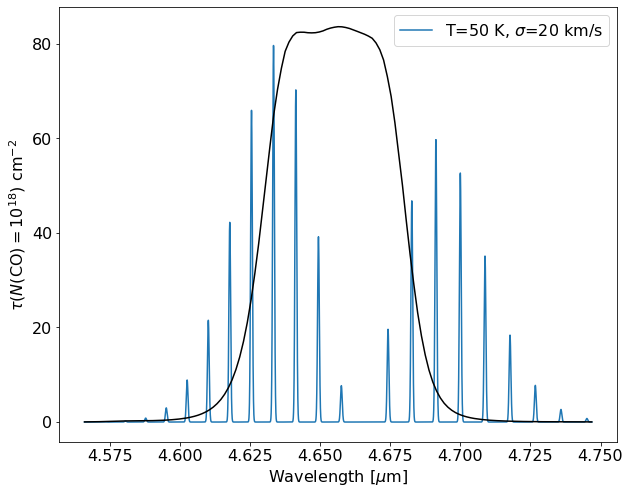

In [18]:
fig = pl.figure()
assert np.all(fig.get_size_inches() == (10,8))

xarr = wavelength_table_466['Wavelength'].quantity.to(u.um)
xarr = np.linspace(xarr.min(), xarr.max(), int(1e4))

for T in [50, ]:
    L, = pl.plot(xarr,
                    pyspeckitmodels.co_vibration.tau_of_N(xarr.to(u.cm).value, 1e18, T, width=20), label="T={0} K, $\sigma$=20 km/s".format(T))
xarr = wavelength_table_466['Wavelength'].quantity.to(u.um)
pl.plot(xarr, wavelength_table_466['Transmission']/wavelength_table_466['Transmission'].max() * pl.ylim()[1],
        color='k')
pl.legend(loc='best')
pl.xlabel(f"Wavelength [$\mu$m]")
pl.ylabel("$\\tau(N(\\mathrm{CO})=10^{18})~\mathrm{cm^{-2}}$")
fig.savefig(f'{basepath}/paper_figures/CO_F466N_opticaldepth_example_1e18_tau.pdf', bbox_inches='tight')

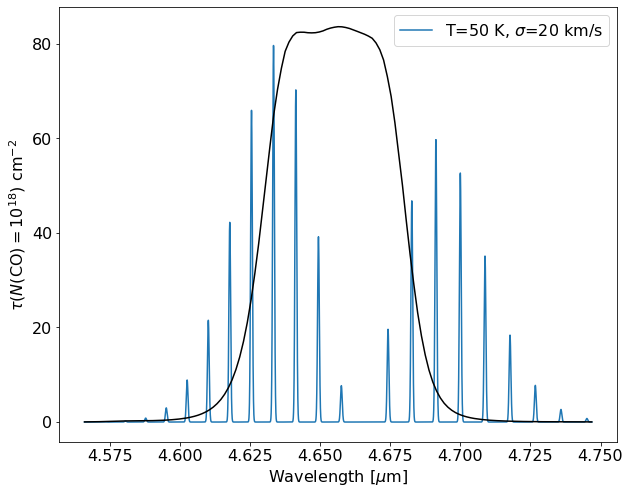

In [22]:
xarr = wavelength_table_466['Wavelength'].quantity.to(u.um)
xarr = np.linspace(xarr.min(), xarr.max(), int(1e4))

for T in [50, ]:
    L, = pl.plot(xarr,
                    pyspeckitmodels.co_vibration.tau_of_N(xarr.to(u.cm).value, 1e18, T, width=20), label="T={0} K, $\sigma$=20 km/s".format(T))
xarr = wavelength_table_466['Wavelength'].quantity.to(u.um)
pl.plot(xarr, wavelength_table_466['Transmission']/wavelength_table_466['Transmission'].max() * pl.ylim()[1],
        color='k')
pl.legend(loc='best')
pl.xlabel(f"Wavelength [$\mu$m]")
pl.ylabel("$\\tau(N(\\mathrm{CO})=10^{18})~\mathrm{cm^{-2}}$");

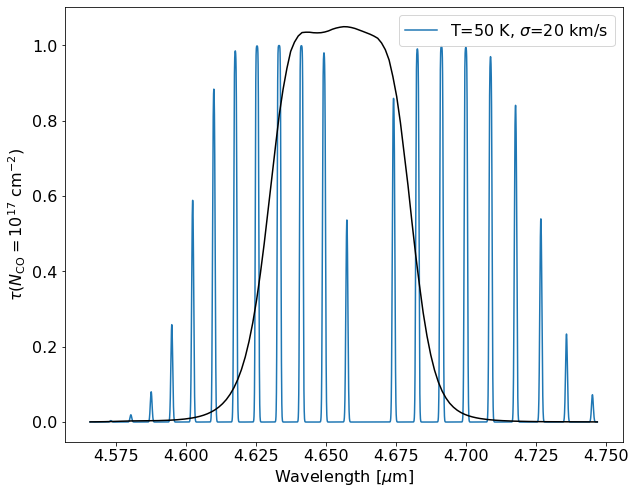

In [33]:
xarr = wavelength_table_466['Wavelength'].quantity.to(u.um)
xarr = np.linspace(xarr.min(), xarr.max(), int(1e4))

for T in [50, ]:
    tau = pyspeckitmodels.co_vibration.tau_of_N(xarr.to(u.cm).value, 1e17, T, width=20)
    L, = pl.plot(xarr,
                    (1-np.exp(-tau)), label="T={0} K, $\sigma$=20 km/s".format(T))
xarr = wavelength_table_466['Wavelength'].quantity.to(u.um)
pl.plot(xarr, wavelength_table_466['Transmission']/wavelength_table_466['Transmission'].max() * pl.ylim()[1],
        color='k')
pl.legend(loc='best')
pl.xlabel(f"Wavelength [$\mu$m]")
pl.ylabel("$\\tau(N_\\mathrm{CO}=10^{17}~\mathrm{cm^{-2}})$")
pl.savefig(f'{basepath}/paper_figures/CO_F466N_absorptionspectrum_example_1e17_exptau.pdf', bbox_inches='tight');

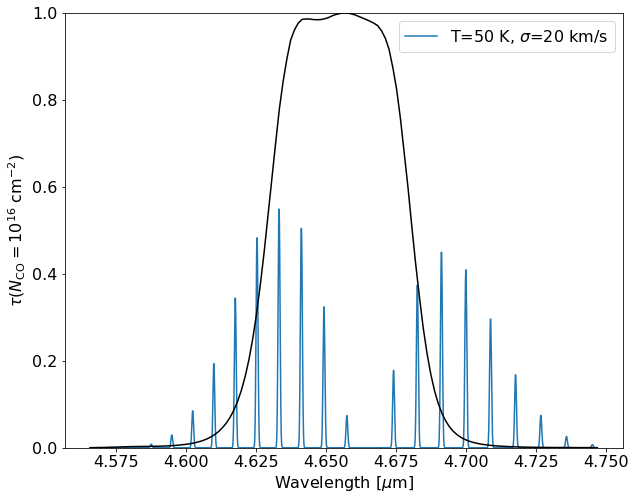

In [36]:
xarr = wavelength_table_466['Wavelength'].quantity.to(u.um)
xarr = np.linspace(xarr.min(), xarr.max(), int(1e4))

for T in [50, ]:
    tau = pyspeckitmodels.co_vibration.tau_of_N(xarr.to(u.cm).value, 1e16, T, width=20)
    L, = pl.plot(xarr,
                    (1-np.exp(-tau)), label="T={0} K, $\sigma$=20 km/s".format(T))
    
pl.ylim(0,1)
xarr = wavelength_table_466['Wavelength'].quantity.to(u.um)
pl.plot(xarr, wavelength_table_466['Transmission']/wavelength_table_466['Transmission'].max() * pl.ylim()[1],
        color='k')
pl.legend(loc='best')
pl.xlabel(f"Wavelength [$\mu$m]")
pl.ylabel("$\\tau(N_{\\mathrm{CO}}=10^{16}~\mathrm{cm^{-2}})$")
pl.savefig(f'{basepath}/paper_figures/CO_F466N_absorptionspectrum_example_1e16_exptau.pdf', bbox_inches='tight');

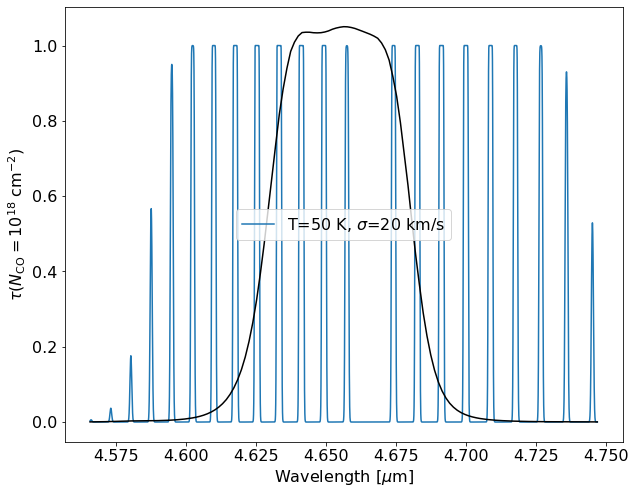

In [35]:
xarr = wavelength_table_466['Wavelength'].quantity.to(u.um)
xarr = np.linspace(xarr.min(), xarr.max(), int(1e4))

for T in [50, ]:
    tau = pyspeckitmodels.co_vibration.tau_of_N(xarr.to(u.cm).value, 1e18, T, width=20)
    L, = pl.plot(xarr,
                    (1-np.exp(-tau)), label="T={0} K, $\sigma$=20 km/s".format(T))

xarr = wavelength_table_466['Wavelength'].quantity.to(u.um)
pl.plot(xarr, wavelength_table_466['Transmission']/wavelength_table_466['Transmission'].max() * pl.ylim()[1],
        color='k')
pl.legend(loc='best')
pl.xlabel(f"Wavelength [$\mu$m]")
pl.ylabel("$\\tau(N_{\\mathrm{CO}}=10^{18}~\mathrm{cm^{-2}})$")
pl.savefig(f'{basepath}/paper_figures/CO_F466N_absorptionspectrum_example_1e18_exptau.pdf', bbox_inches='tight');

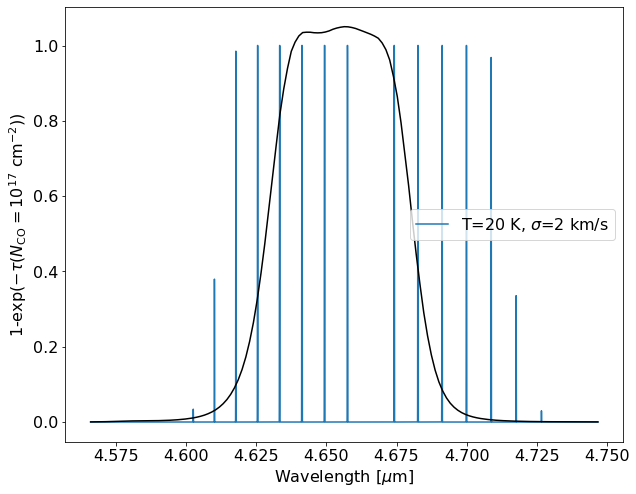

In [26]:
xarr = wavelength_table_466['Wavelength'].quantity.to(u.um)
xarr = np.linspace(xarr.min(), xarr.max(), int(1e4))

for T in [20, ]:
    tau = pyspeckitmodels.co_vibration.tau_of_N(xarr.to(u.cm).value, 1e17, T, width=2)
    L, = pl.plot(xarr,
                    (1-np.exp(-tau)), label="T={0} K, $\sigma$=2 km/s".format(T))
xarr = wavelength_table_466['Wavelength'].quantity.to(u.um)
pl.plot(xarr, wavelength_table_466['Transmission']/wavelength_table_466['Transmission'].max() * pl.ylim()[1],
        color='k')
pl.legend(loc='best')
pl.xlabel(f"Wavelength [$\mu$m]")
pl.ylabel("1-exp($-\\tau(N_{\\mathrm{CO}}=10^{17}\\mathrm{~cm}^{-2})$)")
pl.savefig(f'{basepath}/paper_figures/CO_F466N_absorptionspectrum_example_DiskClouds.pdf', bbox_inches='tight')

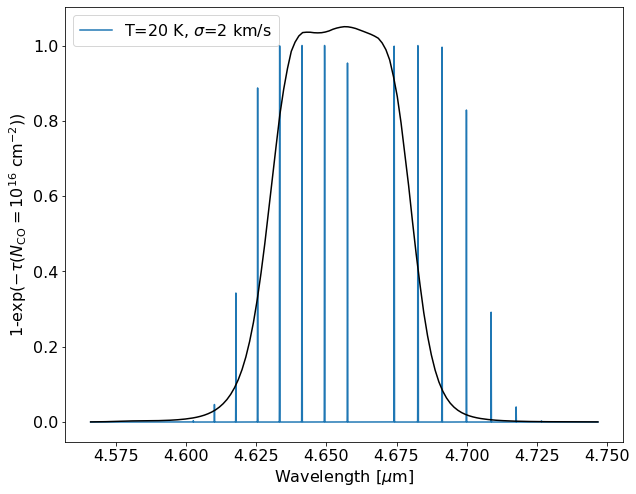

In [37]:
xarr = wavelength_table_466['Wavelength'].quantity.to(u.um)
xarr = np.linspace(xarr.min(), xarr.max(), int(1e4))

for T in [20, ]:
    tau = pyspeckitmodels.co_vibration.tau_of_N(xarr.to(u.cm).value, 1e16, T, width=2)
    L, = pl.plot(xarr,
                    (1-np.exp(-tau)), label="T={0} K, $\sigma$=2 km/s".format(T))
xarr = wavelength_table_466['Wavelength'].quantity.to(u.um)
pl.plot(xarr, wavelength_table_466['Transmission']/wavelength_table_466['Transmission'].max() * pl.ylim()[1],
        color='k')
pl.legend(loc='best')
pl.xlabel(f"Wavelength [$\mu$m]")
pl.ylabel("1-exp($-\\tau(N_{\\mathrm{CO}}=10^{16}\\mathrm{~cm}^{-2})$)")
pl.savefig(f'{basepath}/paper_figures/CO_F466N_absorptionspectrum_example_DiskClouds_thin.pdf', bbox_inches='tight')

In [38]:
xarr = wavelength_table_466['Wavelength'].quantity.to(u.um)
xarr = np.linspace(xarr.min(), xarr.max(), int(1e4))
trans = np.interp(xarr, wavelength_table_466['Wavelength'], wavelength_table_466['Transmission'])
transmission_sum = (trans).sum()
def fractional_absorption(temperature, column, linewidth):
    tau = pyspeckitmodels.co_vibration.tau_of_N(xarr.to(u.cm).value,
                                                column.to(u.cm**-2).value,
                                                temperature.to(u.K).value,
                                                width=linewidth.to(u.km/u.s).value)
    absorbed_fraction = ((1-np.exp(-tau)) * trans).sum() / transmission_sum
    return absorbed_fraction

In [56]:
temperatures = np.linspace(5, 150, 25)*u.K
linewidths = np.linspace(1, 100, 24)*u.km/u.s
column = 1e18*u.cm**-2
grid = [[fractional_absorption(T, column, sig) for T in temperatures]
        for sig in tqdm(linewidths)]

  0%|          | 0/24 [00:00<?, ?it/s]

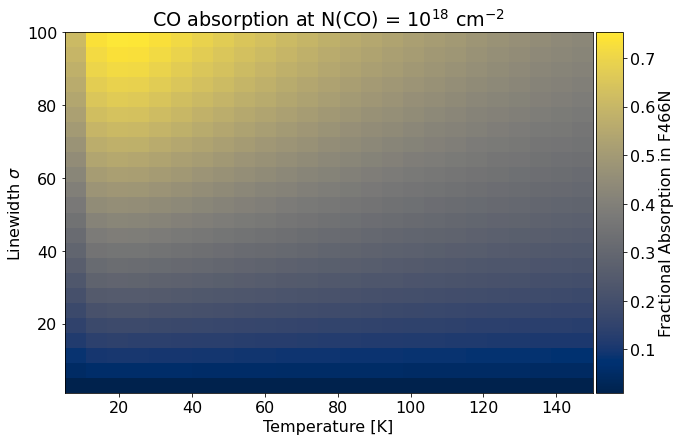

In [57]:
ax = pl.gca()
im = ax.imshow(grid, extent=[temperatures.min().value, temperatures.max().value,
                        linewidths.min().value, linewidths.max().value],
          origin='lower', cmap='cividis')
pl.xlabel("Temperature [K]")
pl.ylabel("Linewidth $\sigma$")
pl.title("CO absorption at N(CO) = 10$^{18}$ cm$^{-2}$")

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = pl.colorbar(cax=cax, mappable=im)
   
cb.set_label("Fractional Absorption in F466N")

In [58]:
levels=[0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5]
colors=['w', 'y', 'g', 'c', 'r', 'b', 'purple', 'orange']

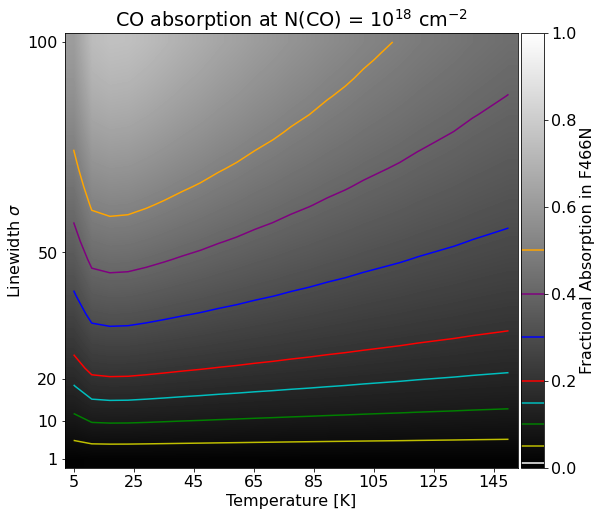

In [59]:
ax = pl.gca()
im = ax.imshow(grid, 
               #extent=[np.log10(column.min().value), np.log10(column.max().value),
               #        linewidths.min().value, linewidths.max().value],
               origin='lower',
               interpolation='bilinear',
               vmin=0,
               vmax=1,
               cmap='gray')
con = ax.contour(grid, levels=levels, colors=colors)
pl.xlabel("Temperature [K]")
pl.ylabel("Linewidth $\sigma$")
pl.title("CO absorption at N(CO) = 10$^{18}$ cm$^{-2}$")


sigma_labels = [1,10,20,50,100]
ax.yaxis.set_ticks(np.interp(sigma_labels, linewidths.value, np.arange(len(linewidths)), right=np.nan),
                   labels=sigma_labels)
tem_labels = np.arange(temperatures.min().value, temperatures.max().value, 20, dtype='int')
ax.xaxis.set_ticks(np.interp(tem_labels, (temperatures.value), np.arange(len(temperatures)), right=np.nan),
                   labels=tem_labels)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = pl.colorbar(cax=cax, mappable=im)
cb.set_label("Fractional Absorption in F466N")
cb.ax.hlines(con.levels, *cb.ax.get_xlim(), colors=con.colors)


pl.savefig(f'{basepath}/paper_figures/CO_F466N_absorption_1e18co_coldens.pdf', bbox_inches='tight')

In [74]:
temperature = 60*u.K
linewidths = np.linspace(1, 100, 24)*u.km/u.s
column = np.logspace(15,19,24)*u.cm**-2
grid_sigcol = [[fractional_absorption(temperature, col, sig) for col in column]
                for sig in tqdm(linewidths)]

  0%|          | 0/24 [00:00<?, ?it/s]

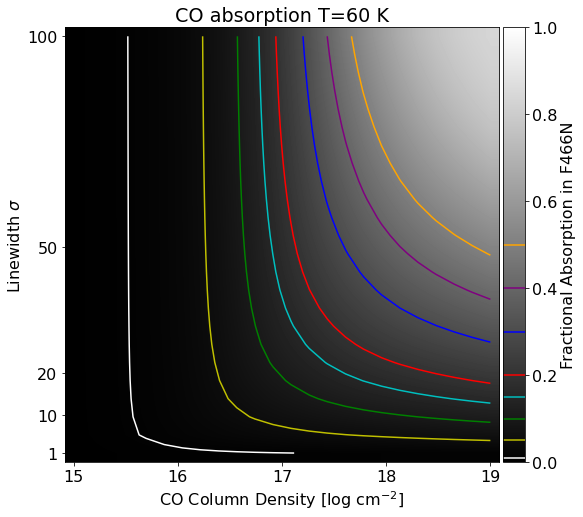

In [75]:
ax = pl.gca()
im = ax.imshow(grid_sigcol, 
               #extent=[np.log10(column.min().value), np.log10(column.max().value),
               #        linewidths.min().value, linewidths.max().value],
               origin='lower',
               interpolation='bilinear',
               vmin=0,
               vmax=1,
               cmap='gray')
con = ax.contour(grid_sigcol, levels=levels, colors=colors)
pl.xlabel("CO Column Density [log cm$^{-2}$]")
pl.ylabel("Linewidth $\sigma$")
pl.title("CO absorption T=60 K")


# a hideous way to format the axis
# @pl.FuncFormatter
# def log_scaler(x, pos):
#     'The two args are the value and tick position'
#     try:
#         col = np.interp(x, np.arange(len(column)), column.value)
#         return f'{np.log10(col):0.1f}'
#     except Exception:
#         return None
# ax.xaxis.set_major_formatter(log_scaler)
# @pl.FuncFormatter
# def sig_scaler(x, pos):
#     'The two args are the value and tick position'
#     sig = np.interp(x, np.arange(len(linewidths)), linewidths.value)
#     return f'{sig:0.1f}'
# ax.yaxis.set_major_formatter(sig_scaler)
sigma_labels = [1,10,20,50,100]
ax.yaxis.set_ticks(np.interp(sigma_labels, linewidths.value, np.arange(len(linewidths)), right=np.nan),
                   labels=sigma_labels)
col_labels = [15,16,17,18,19,]
ax.xaxis.set_ticks(np.interp(col_labels, np.log10(column.value), np.arange(len(column)), right=np.nan),
                   labels=col_labels)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = pl.colorbar(cax=cax, mappable=im)
cb.set_label("Fractional Absorption in F466N")
cb.ax.hlines(con.levels, *cb.ax.get_xlim(), colors=con.colors)


pl.savefig(f'{basepath}/paper_figures/CO_F466N_absorption_60K.pdf', bbox_inches='tight')

In [76]:
temperature = 20*u.K
linewidths = np.linspace(1, 100, 24)*u.km/u.s
column = np.logspace(15,19,24)*u.cm**-2
grid_sigcol_20K = [[fractional_absorption(temperature, col, sig) for col in column]
                for sig in tqdm(linewidths)]

  0%|          | 0/24 [00:00<?, ?it/s]

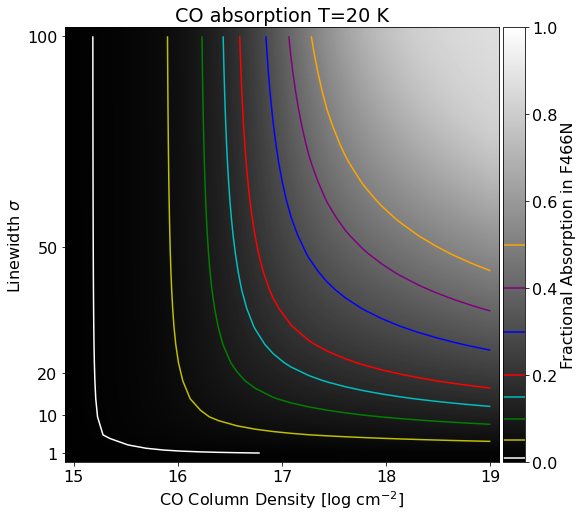

In [77]:
ax = pl.gca()
im = ax.imshow(grid_sigcol_20K, 
               #extent=[np.log10(column.min().value), np.log10(column.max().value),
               #        linewidths.min().value, linewidths.max().value],
               origin='lower',
               interpolation='bilinear',
               vmin=0,
               vmax=1,
               cmap='gray')
con = ax.contour(grid_sigcol_20K, levels=levels, colors=colors)
pl.xlabel("CO Column Density [log cm$^{-2}$]")
pl.ylabel("Linewidth $\sigma$")
pl.title("CO absorption T=20 K")


# a hideous way to format the axis
# @pl.FuncFormatter
# def log_scaler(x, pos):
#     'The two args are the value and tick position'
#     try:
#         col = np.interp(x, np.arange(len(column)), column.value)
#         return f'{np.log10(col):0.1f}'
#     except Exception:
#         return None
# ax.xaxis.set_major_formatter(log_scaler)
# @pl.FuncFormatter
# def sig_scaler(x, pos):
#     'The two args are the value and tick position'
#     sig = np.interp(x, np.arange(len(linewidths)), linewidths.value)
#     return f'{sig:0.1f}'
# ax.yaxis.set_major_formatter(sig_scaler)
sigma_labels = [1,10,20,50,100]
ax.yaxis.set_ticks(np.interp(sigma_labels, linewidths.value, np.arange(len(linewidths)), right=np.nan),
                   labels=sigma_labels)
col_labels = [15,16,17,18,19,]
ax.xaxis.set_ticks(np.interp(col_labels, np.log10(column.value), np.arange(len(column)), right=np.nan),
                   labels=col_labels)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = pl.colorbar(cax=cax, mappable=im)
cb.set_label("Fractional Absorption in F466N")
cb.ax.hlines(con.levels, *cb.ax.get_xlim(), colors=con.colors)


pl.savefig(f'{basepath}/paper_figures/CO_F466N_absorption_20K_matched_60K.pdf', bbox_inches='tight')

In [78]:
temperature = 20*u.K
linewidths = np.linspace(0.1, 10, 24)*u.km/u.s
column = np.logspace(15,19,24)*u.cm**-2
grid_sigcol_20K = [[fractional_absorption(temperature, col, sig) for col in column]
                for sig in tqdm(linewidths)]

  0%|          | 0/24 [00:00<?, ?it/s]

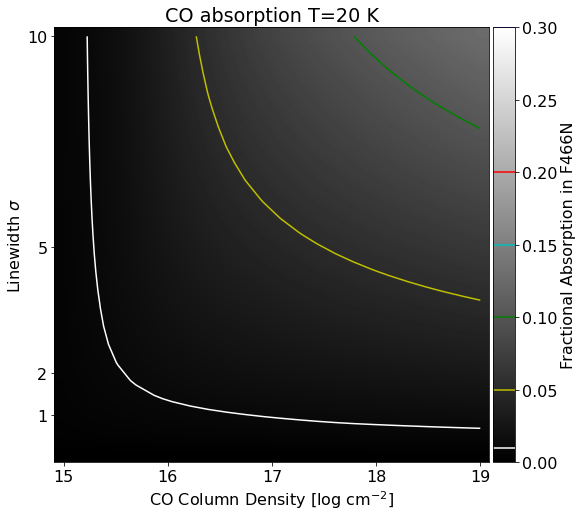

In [79]:
ax = pl.gca()
im = ax.imshow(grid_sigcol_20K, 
               #extent=[np.log10(column.min().value), np.log10(column.max().value),
               #        linewidths.min().value, linewidths.max().value],
               origin='lower',
               interpolation='bilinear',
               vmin=0,
               vmax=0.3,
               cmap='gray')
con = ax.contour(grid_sigcol_20K, levels=levels, colors=colors)
pl.xlabel("CO Column Density [log cm$^{-2}$]")
pl.ylabel("Linewidth $\sigma$")
pl.title("CO absorption T=20 K")


# a hideous way to format the axis
# @pl.FuncFormatter
# def log_scaler(x, pos):
#     'The two args are the value and tick position'
#     try:
#         col = np.interp(x, np.arange(len(column)), column.value)
#         return f'{np.log10(col):0.1f}'
#     except Exception:
#         return None
# ax.xaxis.set_major_formatter(log_scaler)
# @pl.FuncFormatter
# def sig_scaler(x, pos):
#     'The two args are the value and tick position'
#     sig = np.interp(x, np.arange(len(linewidths)), linewidths.value)
#     return f'{sig:0.1f}'
# ax.yaxis.set_major_formatter(sig_scaler)
sigma_labels = [1,2,5,10,20,50,100]
ax.yaxis.set_ticks(np.interp(sigma_labels, linewidths.value, np.arange(len(linewidths)), right=np.nan),
                   labels=sigma_labels)
col_labels = [15,16,17,18,19,]
ax.xaxis.set_ticks(np.interp(col_labels, np.log10(column.value), np.arange(len(column)), right=np.nan),
                   labels=col_labels)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = pl.colorbar(cax=cax, mappable=im)
cb.set_label("Fractional Absorption in F466N")
cb.ax.hlines(con.levels, *cb.ax.get_xlim(), colors=con.colors)


pl.savefig(f'{basepath}/paper_figures/CO_F466N_absorption_20K.pdf', bbox_inches='tight')

In [47]:
import pylab

Text(0, 0.5, '$\\tau(N=10^{18})$')

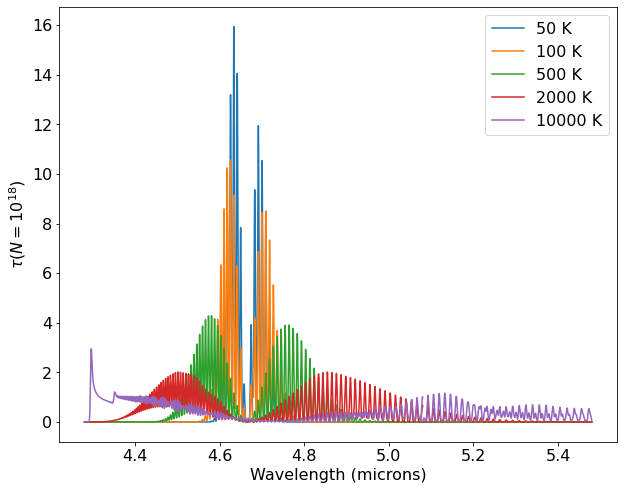

In [48]:
temperatures = np.linspace(2000,8000,50)
xarr1 = np.linspace(4.28, 4.68,5000)
peak_lambda_one = [ xarr1[pyspeckitmodels.co_vibration.tau_of_N(xarr1*1e-4,1e18,T,width=20).argmax()] for T in temperatures ] 
xarr2 = np.linspace(4.68, 5.08,5000)
peak_lambda_two = [ xarr2[pyspeckitmodels.co_vibration.tau_of_N(xarr2*1e-4,1e18,T,width=20).argmax()] for T in temperatures ] 
xarr3 = np.linspace(5.08, 5.48,5000)
peak_lambda_three = [ xarr3[pyspeckitmodels.co_vibration.tau_of_N(xarr3*1e-4,1e18,T,width=20).argmax()] for T in temperatures ] 

# pylab.figure(17)
# pylab.clf()
# pylab.plot(temperatures,peak_lambda_one)
# pylab.plot(temperatures,peak_lambda_two)
# pylab.plot(temperatures,peak_lambda_three)

pylab.figure(16)
pylab.clf()
for T in [50, 100, 500, 2000, 10000]:
    L, = pylab.plot(xarr1,pyspeckitmodels.co_vibration.tau_of_N(xarr1*1e-4,1e18,T,width=100), label="{0} K".format(T))
    L, = pylab.plot(xarr2,pyspeckitmodels.co_vibration.tau_of_N(xarr2*1e-4,1e18,T,width=100), color=L.get_color())
    L, = pylab.plot(xarr3,pyspeckitmodels.co_vibration.tau_of_N(xarr3*1e-4,1e18,T,width=100), color=L.get_color())
pylab.legend(loc='best')
pylab.xlabel("Wavelength (microns)")
pylab.ylabel("$\\tau(N=10^{18})$")


Text(0, 0.5, '$S_\\nu(N=10^{17})$ [erg s$^{-1}$ cm$^{-2}$ A$^{-1}$]')

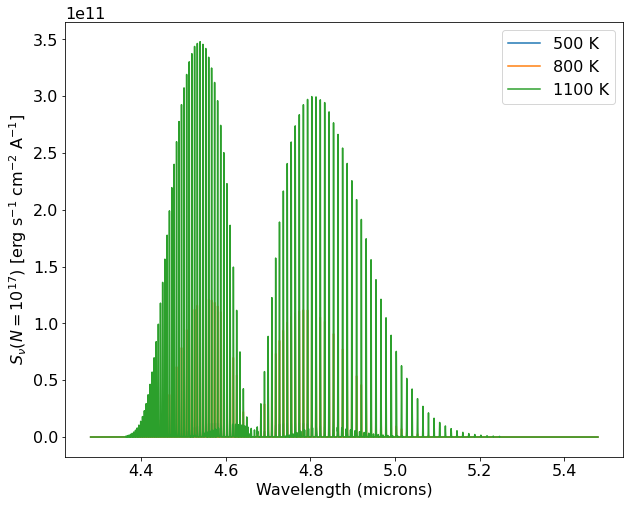

In [49]:
pylab.figure(6)
pylab.clf()
for T in [500, 800, 1100]:
    L, = pylab.plot(xarr1,
                    pyspeckitmodels.co_vibration.modelemissionspectrum(xarr1*1e-4,
                                                                       column=1e17, tex=T,
                                                                       width=20, unit='cm'),
                    label="{0} K".format(T))
    L, = pylab.plot(xarr2,
                    pyspeckitmodels.co_vibration.modelemissionspectrum(xarr2*1e-4,
                                                                       column=1e17, tex=T,
                                                                       width=20, unit='cm'),
                    color=L.get_color())
    L, = pylab.plot(xarr3,
                    pyspeckitmodels.co_vibration.modelemissionspectrum(xarr3*1e-4,
                                                                       column=1e17, tex=T,
                                                                       width=20, unit='cm'),
                    color=L.get_color())
pylab.legend(loc='best')
pylab.xlabel("Wavelength (microns)")
pylab.ylabel("$S_\\nu(N=10^{17})$ [erg s$^{-1}$ cm$^{-2}$ A$^{-1}$]")



First  bandhead: 4.466357
Second bandhead: 5.079200
Third  bandhead: 5.092402
13CO First  bandhead: 4.565177
13CO Second bandhead: 5.070558
13CO Third  bandhead: 5.208186


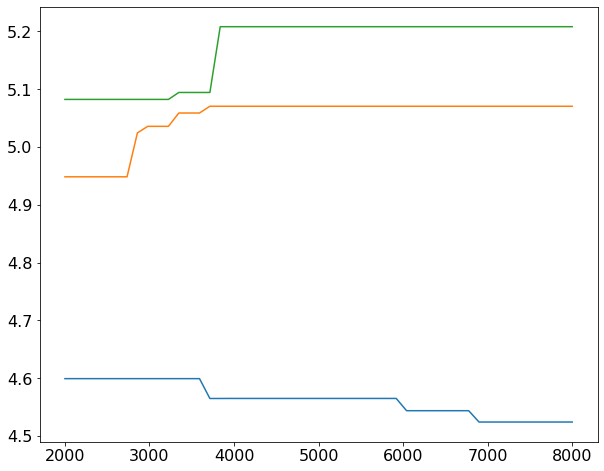

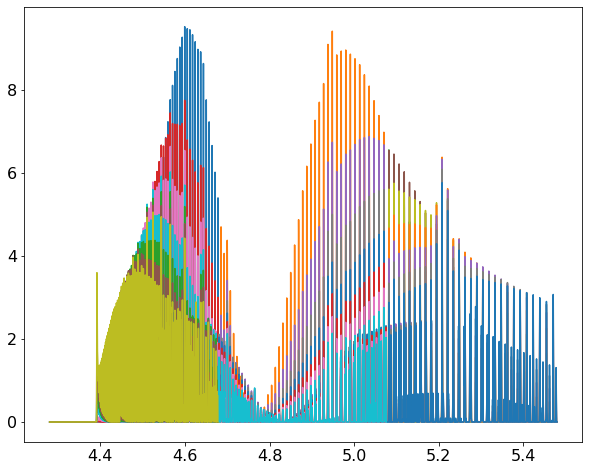

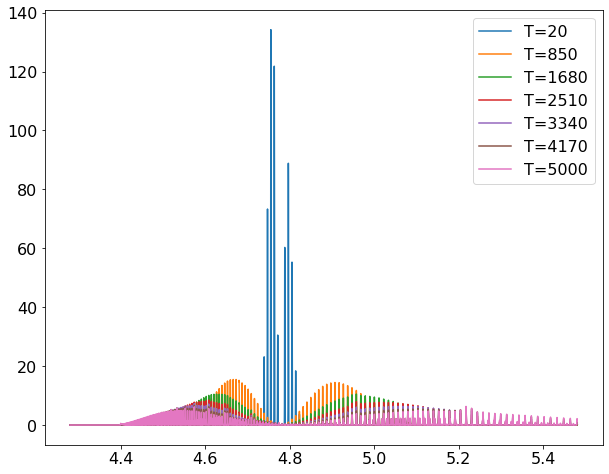

In [50]:
print("First  bandhead: %f" % np.median(peak_lambda_one))
print("Second bandhead: %f" % np.median(peak_lambda_two))
print("Third  bandhead: %f" % np.median(peak_lambda_three))

temperatures = np.linspace(2000,8000,50)
peak_lambda_13co_one = [ xarr1[pyspeckitmodels.co_vibration.tau_of_N(xarr1*1e-4,1e18,T,width=20,isotopomer=36).argmax()] for T in temperatures ] 
peak_lambda_13co_two = [ xarr2[pyspeckitmodels.co_vibration.tau_of_N(xarr2*1e-4,1e18,T,width=20,isotopomer=36).argmax()] for T in temperatures ] 
peak_lambda_13co_three = [ xarr3[pyspeckitmodels.co_vibration.tau_of_N(xarr3*1e-4,1e18,T,width=20,isotopomer=36).argmax()] for T in temperatures ] 

pylab.figure(19)
pylab.clf()
pylab.plot(temperatures,peak_lambda_13co_one)
pylab.plot(temperatures,peak_lambda_13co_two)
pylab.plot(temperatures,peak_lambda_13co_three)

pylab.figure(18)
pylab.clf()
for T in np.linspace(2000,8000,7):
    pylab.plot(xarr1,pyspeckitmodels.co_vibration.tau_of_N(xarr1*1e-4,1e18,T,width=20,isotopomer=36))
    pylab.plot(xarr2,pyspeckitmodels.co_vibration.tau_of_N(xarr2*1e-4,1e18,T,width=20,isotopomer=36))
    pylab.plot(xarr3,pyspeckitmodels.co_vibration.tau_of_N(xarr3*1e-4,1e18,T,width=20,isotopomer=36))

print("13CO First  bandhead: %f" % np.median(peak_lambda_13co_one))
print("13CO Second bandhead: %f" % np.median(peak_lambda_13co_two))
print("13CO Third  bandhead: %f" % np.median(peak_lambda_13co_three))

pylab.figure(20)
pylab.clf()
for T in np.linspace(20,5000,7):
    l, = pylab.plot(xarr1,pyspeckitmodels.co_vibration.tau_of_N(xarr1*1e-4,1e18,T,width=20,isotopomer=28),label='T=%i' % T)
    l, = pylab.plot(xarr2,pyspeckitmodels.co_vibration.tau_of_N(xarr2*1e-4,1e18,T,width=20,isotopomer=28), color=l.get_color())
    l, = pylab.plot(xarr3,pyspeckitmodels.co_vibration.tau_of_N(xarr3*1e-4,1e18,T,width=20,isotopomer=28), color=l.get_color())
pylab.legend()